**PREDICTING DEFAULTING ON A LOAN GIVEN CREDIT RISK**

Patrick Yu

Dr. Coburn

PSTAT 131 

16 March 2023

##INTRODUCTION

The purpose of this project is to answer the research question "What factors cause defaulting on loans?", and to build a model predicting whether someone will default on their debt. We will be using the credit risk dataset, supplied by Kaggle. This dataset lists a combination of categorical and continuous variables detailing each person's financial situation. 

Data citation: https://www.kaggle.com/datasets/laotse/credit-risk-dataset?resource=download 

Codebook:

person_age: The person's age (continuous)

person_income: The person's annual income (continuous)

person_home_ownership: The status of one's home ownership; rent, mortage, owning, or other (nominal categorical)

person_emp_length:  A person's employment length in years (continuous)

loan_intent: The reason for a person taking out the loan: debt consolidation, home improvement, education, medical reasons, personal reasons, venture capital (nominal categorical) 

loan_grade: The quality of the loan based on a person's credit history (ordinal categorical)

loan_amnt: The amount a person has taken out for loan (continuous)

loan_int_rate: interest rate of a loan (continuous, expressed as a decimal)

loan_status: the response variable we are trying to predict; 0 if the person does not default, 1 if he has) (categorical)

loan_percent_income: the percent of income that the loan amount is (continuous)

cb_person_default_on_file: historical default (Y if the person has defaulted before, N if he hasn't) (cateogorical)

cb_person_cred_hist_length: credit history length (continuous)

Reading in the data:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

data = pd.read_csv('credit_risk_dataset.csv') 

random_sample = []
for i in range(2500):
  random_sample.append(random.randint(0, len(data["person_age"]) - 1))

data = data.iloc[random_sample,]
data.index = range(len(data["person_age"]))
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,28,130000,MORTGAGE,12.0,PERSONAL,B,13000,10.75,0,0.10,N,10
1,25,12000,OWN,0.0,MEDICAL,C,3000,NaN,1,0.25,N,3
2,22,19800,RENT,4.0,MEDICAL,A,8000,NaN,1,0.40,N,4
3,34,36000,OWN,NaN,VENTURE,A,1200,5.42,0,0.03,N,8
4,25,35004,RENT,0.0,PERSONAL,B,7200,9.99,0,0.21,N,4


Splitting the dataset:

Note: we use stratified sampling on the y variable to encompass all of the data

In [ ]:
x = data.loc[:, data.columns != 'loan_status']
y = data['loan_status']

#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify = y)

##EXPLORATORY DATA ANALYSIS

We want to understand certain research questions: how are each of the features correlated with each other? How do we find which value for each predictor is most associated with defaulting and not defaulting? 

First we want to observe how each of the continuous variables correlate with each other. Below is a heatmap of the correlation between all continuous variables.

<Axes: >

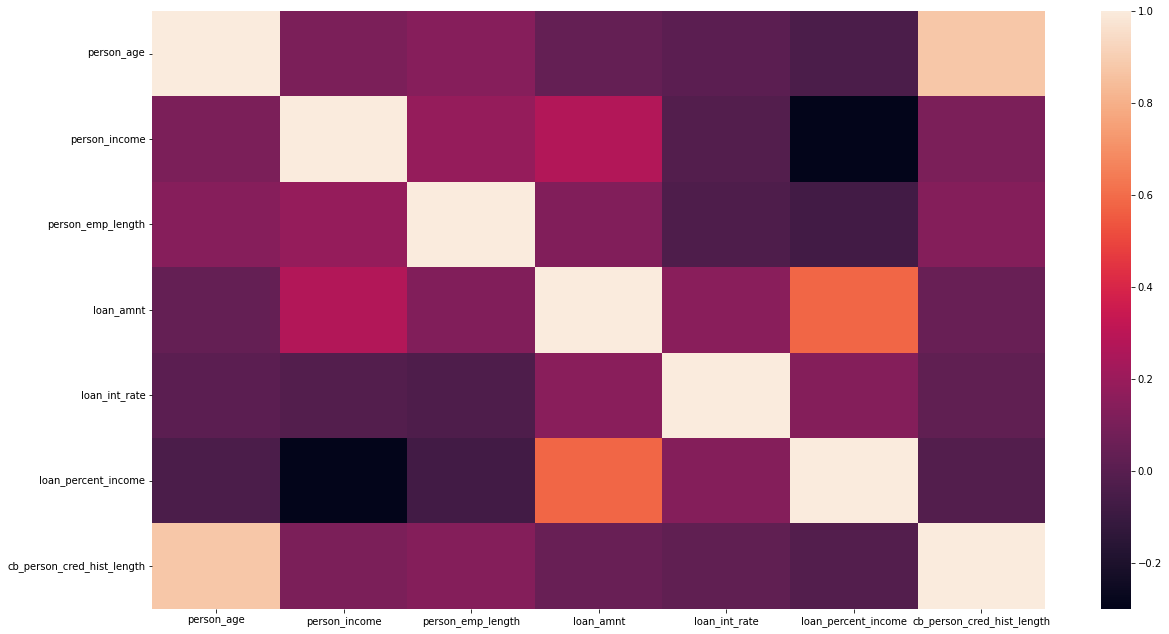

In [ ]:
import seaborn as sns
plt.subplots(figsize=(20,11))
sns.heatmap(x_train.corr())

We see that some of the most positively correlated variables  are a person's age and their credit history length (this makes sense because the older a person is, the more time they would have to develop credit history), loan amount of loan percent income (this makes sense because the more a person makes, the more he can afford to take out on loan), and loan amount and a person's income (this makes sense for the same aforementioned reason). Another way to visualise correlation is by using pairplots; this will show the trend of the data between each pairwise continuous variable.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


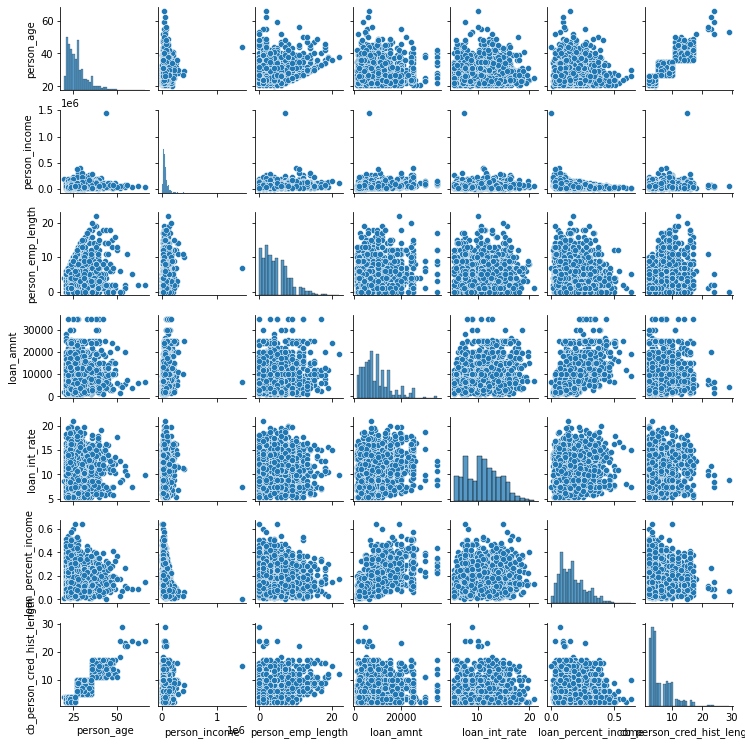

In [ ]:
sns.pairplot(x_train, size = 1.5)

We want to get an understanding of how each variable is distributed. We will plot histograms for the categorical variables to see the frequency of each categorical variable.

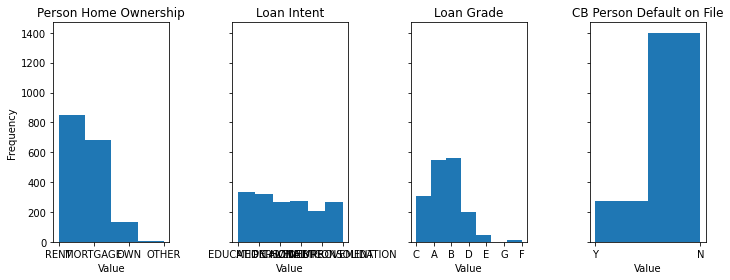

In [ ]:
categorical_variables = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

x1 = x_train['person_home_ownership']
x2 = x_train['loan_intent']
x3 = x_train['loan_grade']
x4 = x_train['cb_person_default_on_file']

fig, axs = plt.subplots(1, 4, figsize=(10, 4), sharey=True)

# Plot each histogram in a separate subplot
axs[0].hist(x1, bins=4)
axs[0].set_title('Person Home Ownership')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(x2, bins=6)
axs[1].set_title('Loan Intent')
axs[1].set_xlabel('Value')

axs[2].hist(x3, bins=7)
axs[2].set_title('Loan Grade')
axs[2].set_xlabel('Value')

axs[3].hist(x4, bins=2)
axs[3].set_title('CB Person Default on File')
axs[3].set_xlabel('Value')

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()

We see that most people rent their places and the least amount of people fully own their places. We also see that loan intent is fiarlky even. Loan grade is primarily A and B (indicating a good grade). The histogram for CB Person Default on File shows that most people have not defaulted yet. 

In [ ]:
y = data.value_counts(["loan_status", "person_home_ownership"]).reset_index()
y["sum_by_home_ownership_status"] = list(range(len(y["loan_status"])))
y["percentage"] = list(range(len(y["loan_status"])))
for i in range(len(y["loan_status"])):
  status = y.iloc[i,1]
  y.iloc[i, 3] = sum(y.loc[y["person_home_ownership"] == status].iloc[:,2])
  y.iloc[i, 4] = y.iloc[i,2] / y.iloc[i,3]
y

,loan_status,person_home_ownership,0,sum_by_home_ownership_status,percentage
0,0,MORTGAGE,895,1014,0.882643
1,0,RENT,836,1263,0.661916
2,1,RENT,427,1263,0.338084
3,0,OWN,205,216,0.949074
4,1,MORTGAGE,119,1014,0.117357
5,1,OWN,11,216,0.050926
6,0,OTHER,5,7,0.714286
7,1,OTHER,2,7,0.285714


This table over here shows the percentage of defaulting or not for each homeownership status: for example, 88% of people with a mortage will not default. We see that those who fully own their homes have the smallest proportion of defaulting, while those renting have the highest proportion of defaulting. This makes sense, as those who fully own their homes are likely wealthier and probably wouldn't have a high chance of defaulting on debt. Those who rent their places default the most; again, this makes sense as those who rent are likely the least wealthiest among each person in the dataset. We will replicate this for the other categorical variables in the dataset. 

In [ ]:
y = data.value_counts(["loan_status", "loan_intent"]).reset_index()
y["sum_by_intents"] = list(range(len(y["loan_status"])))
y["percentage"] = list(range(len(y["loan_status"])))
for i in range(len(y["loan_status"])):
  intent = y.iloc[i,1]
  y.iloc[i, 3] = sum(y.loc[y["loan_intent"] == intent].iloc[:,2])
  y.iloc[i, 4] = y.iloc[i, 2] / y.iloc[i, 3]
y

,loan_status,loan_intent,0,sum_by_intents,percentage
0,0,EDUCATION,406,494,0.821862
1,0,MEDICAL,357,487,0.733060
2,0,VENTURE,356,412,0.864078
3,0,PERSONAL,325,408,0.796569
4,0,DEBTCONSOLIDATION,269,394,0.682741
5,0,HOMEIMPROVEMENT,228,305,0.747541
6,1,MEDICAL,130,487,0.266940
7,1,DEBTCONSOLIDATION,125,394,0.317259
8,1,EDUCATION,88,494,0.178138
9,1,PERSONAL,83,408,0.203431


We see here that those who take out loans for medical reasons or debt consolidation will default the most. This makes sense, considering the high price of medical bills. Debt consolidation, in general, refers to taking out loans for the purpose of repaying other loans. These people in general would probably not be in the healthiest financial situation, hence the high default rate for them. Venture debt  refers to raising money for the purpose of investing; these people would probably be in good financial health. 

In [ ]:
y = data.value_counts(["loan_status", "loan_grade"]).reset_index()
y["sum_by_intents"] = list(range(len(y["loan_status"])))
y["percentage"] = list(range(len(y["loan_status"])))
for i in range(len(y["loan_status"])):
  grade = y.iloc[i,1]
  y.iloc[i, 3] = sum(y.loc[y["loan_grade"] == grade].iloc[:,2])
  y.iloc[i, 4] = y.iloc[i, 2] / y.iloc[i, 3]
y

,loan_status,loan_grade,0,sum_by_intents,percentage
0,0,A,733,821,0.892814
1,0,B,691,832,0.830529
2,0,C,362,458,0.790393
3,1,D,169,291,0.580756
4,1,B,141,832,0.169471
5,0,D,122,291,0.419244
6,1,C,96,458,0.209607
7,1,A,88,821,0.107186
8,1,E,51,81,0.629630
9,0,E,30,81,0.370370


Needless to say, the better the loan grade (A is the best, G worst), the more likely the person will not default. 

##DATA RECIPE

We will merge the values of categorical variables that sparsely appear: loan grade E, F, and G; owning a home and "other" home ownership

In [ ]:
for i in range(len(x_train["loan_grade"])):
  if  x_train.iloc[i, 5]== "E" or x_train.iloc[i, 5] == "F" or x_train.iloc[i, 5] == "G":
    x_train.iloc[i, 5] = "EFG"

for i in range(len(x_train["person_home_ownership"])):
  if x_train.iloc[i, 2] == "OWN" or x_train.iloc[i, 2] == "OTHER":
    x_train.iloc[i, 2] = "OWN/OTHER"

for i in range(len(x_test["loan_grade"])):
  if  x_test.iloc[i, 5]== "E" or x_test.iloc[i, 5] == "F" or x_test.iloc[i, 5] == "G":
    x_test.iloc[i, 5] = "EFG"

for i in range(len(x_test["person_home_ownership"])):
  if x_test.iloc[i, 2] == "OWN" or x_test.iloc[i, 2] == "OTHER":
    x_test.iloc[i, 2] = "OWN/OTHER"

We now must address the missing data

In [ ]:
#We now need to figure out a way to handle all of the null values
#This for loop will show how any null values are in each column
for i in range(11):
  print(x_train.columns[i] + ": " + str(x_train.iloc[:,i].isnull().sum()))

person_age: 0
person_income: 0
person_home_ownership: 0
person_emp_length: 58
loan_intent: 0
loan_grade: 0
loan_amnt: 0
loan_int_rate: 149
loan_percent_income: 0
cb_person_default_on_file: 0
cb_person_cred_hist_length: 0


As we can see, the only null values are in employment length and the loan's interest rate. For these to be null, this means the person taking out the loan must be unemployed, so we just replace it with zero, and for the second column, the implication is that the person just took out a zero interest loan, so we also replace it with 0

In [ ]:
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)

We can simply drop loan percent income; this feature can be easily calculated by dividing loan amount by income. It isn't as useful as knowing a person's income or loan amount, and it's too correlated; it will cause overfitting. For that same reason, we can drop the age feature, as it isn't as useful as knowing a person's credit history length.

We can dummy code cb_person_default_on_file since it is binary categorical

In [ ]:
for i in range(len(x_train["cb_person_default_on_file"])):
  if x_train.iloc[i, 9] == "Y":
    x_train.iloc[i, 9] = 1
  else: 
    x_train.iloc[i, 9] = 0

for i in range(len(x_test["cb_person_default_on_file"])):
  if x_test.iloc[i, 9] == "Y":
    x_test.iloc[i, 9] = 1
  else: 
    x_test.iloc[i, 9] = 0

x_train['cb_person_default_on_file'] = x_train['cb_person_default_on_file'].astype(object)
x_test['cb_person_default_on_file'] = x_test['cb_person_default_on_file'].astype(object)

Dummy coding our other categorical variables is not an option here; since we have many categorical predictors, and each one has several dimensions, we will have far too many columns in the dataframe, leading to poor accuracy. Instead, we see above that certain values for categorical variables are associated with higher and lower rates of defaulting. Thus, while these categorical variables seem nominal, they can actually be ordinal. We can rank each variable based on its associated rate of defaulting and encode them. 

For loan grade, A has the lowest default rate and EFG has the highest default rate. 

For loan intent, venture has the lowest default rate and medical has the highest rate.

For home ownership status, owning/other has the highest default rate and renting has the highest

In [ ]:
for i in range(len(x_train["person_home_ownership"])):
  if x_train.iloc[i, 2] == "OWN/OTHER":
    x_train.iloc[i, 2] = 0
  elif x_train.iloc[i, 2] == "MORTGAGE":
    x_train.iloc[i, 2] = 1
  elif x_train.iloc[i, 2] == "RENT":
    x_train.iloc[i, 2] = 2
x_train['person_home_ownership'] = x_train['person_home_ownership'].astype(object)

for i in range(len(x_train["loan_intent"])):
  if x_train.iloc[i, 4] == "VENTURE":
    x_train.iloc[i, 4] = 0
  elif x_train.iloc[i, 4] == "EDUCATION":
    x_train.iloc[i, 4] = 1
  elif x_train.iloc[i, 4] == "PERSONAL":
    x_train.iloc[i, 4] = 2
  elif x_train.iloc[i, 4] == "DEBTCONSOLIDATION":
    x_train.iloc[i, 4] = 3
  elif x_train.iloc[i, 4] == "HOMEIMPROVEMENT":
    x_train.iloc[i, 4] = 4
  elif x_train.iloc[i, 4] == "MEDICAL":
    x_train.iloc[i, 4] = 5
x_train['loan_intent'] = x_train['loan_intent'].astype(object)

for i in range(len(x_train["loan_grade"])):
  if x_train.iloc[i, 5] == "A":
    x_train.iloc[i, 5] = 0
  elif x_train.iloc[i, 5] == "B":
    x_train.iloc[i, 5] = 1
  elif x_train.iloc[i, 5] == "C":
    x_train.iloc[i, 5] = 2
  elif x_train.iloc[i, 5] == "D":
    x_train.iloc[i, 5] = 2
  elif x_train.iloc[i, 5] == "EFG":
    x_train.iloc[i, 5] = 2
x_train['loan_grade'] = x_train['loan_grade'].astype(object)

for i in range(len(x_test["person_home_ownership"])):
  if x_test.iloc[i, 2] == "OWN/OTHER":
    x_test.iloc[i, 2] = 0
  elif x_test.iloc[i, 2] == "MORTGAGE":
    x_test.iloc[i, 2] = 1
  elif x_test.iloc[i, 2] == "RENT":
    x_test.iloc[i, 2] = 2
x_test['person_home_ownership'] = x_test['person_home_ownership'].astype(object)

for i in range(len(x_test["loan_intent"])):
  if x_test.iloc[i, 4] == "VENTURE":
    x_test.iloc[i, 4] = 0
  elif x_test.iloc[i, 4] == "EDUCATION":
    x_test.iloc[i, 4] = 1
  elif x_test.iloc[i, 4] == "PERSONAL":
    x_test.iloc[i, 4] = 2
  elif x_test.iloc[i, 4] == "DEBTCONSOLIDATION":
    x_test.iloc[i, 4] = 3
  elif x_test.iloc[i, 4] == "HOMEIMPROVEMENT":
    x_test.iloc[i, 4] = 4
  elif x_test.iloc[i, 4] == "MEDICAL":
    x_test.iloc[i, 4] = 5
x_test['loan_intent'] = x_test['loan_intent'].astype(object)

for i in range(len(x_test["loan_grade"])):
  if x_test.iloc[i, 5] == "A":
    x_test.iloc[i, 5] = 0
  elif x_test.iloc[i, 5] == "B":
    x_test.iloc[i, 5] = 1
  elif x_test.iloc[i, 5] == "C":
    x_test.iloc[i, 5] = 2
  elif x_test.iloc[i, 5] == "D":
    x_test.iloc[i, 5] = 2
  elif x_test.iloc[i, 5] == "EFG":
    x_test.iloc[i, 5] = 2
x_test['loan_grade'] = x_test['loan_grade'].astype(object)

We can simply drop loan percent income; this feature can be easily calculated by dividing loan amount by income. It isn't as useful as knowing a person's income or loan amount, and it's too correlated; it will cause overfitting. For that same reason, we can drop the age feature, as it isn't as useful as knowing a person's credit history length.

In [ ]:
x_train = x_train.drop(['person_income', 'person_age'], axis = 1)

x_test = x_test.drop(['person_income', 'person_age'], axis = 1)

We want to centre our predictors to avoid multicollinearity issues. 

## MODEL SEELCTION AND PERFORMANCE

We will use cross validation to fit the data and tune the hyper parameters for a Random Forest, Gradient Boosting, and K Nearest Neighbours model. We pick these models, along with a Logistic Regression model, for the following reasons:

- The random forest, in general, handles large datasets very well and performs better than decision trees and logistic regression if there is a complex, nonlinear relationship between the predictors
- The Gradient Boosting model usually performs better than random forest in the case when we don't have "noisy" variables, because for GB, it additively adds each tree in such a way that it corrects the mistakes of its predecessors (RF does not do this)
- We would use Logistic Regression in case there is a simple, linear relationship between each variable
- We also use K Nearest Neighbors because the lazy learning aspect (where it waits to see data before making predictions) may lead to a high accuracy score

In [ ]:
#centering all predictors
centered_preds = ["person_emp_length", "loan_amnt", "cb_person_cred_hist_length"]
for column in centered_preds:
	x_train[column] = (x_train[column] -
						x_train[column].mean()) / x_train[column].std()	

for column in centered_preds:
	x_test[column] = (x_test[column] -
						x_test[column].mean()) / x_test[column].std()
			
# view normalized data
x_train.head()


,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2056,2,-1.176428,1,2,0.082202,12.61,0.37,1,-0.446877
1555,1,0.917083,5,0,-0.080738,0.00,0.11,0,-0.446877
931,2,-0.653050,2,2,-1.384265,13.49,0.01,0,0.594903
2137,2,-1.176428,1,0,-0.830266,6.76,0.18,0,-0.967768
834,2,0.132016,1,1,-0.536973,12.42,0.13,0,-0.707322


Model 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0).fit(x_train, y_train)

In [ ]:
prediction = classifier.predict(x_test)

In [ ]:
from sklearn import metrics

metrics.roc_auc_score(y_true = y_test, y_score = prediction)

0.6663882859662213

We first see a poor ROC AUC curve, and it is likely that the data's high dimensionality led to too much variance and an overfit model. To remedy this, we will use PCA analysis to reduce the number of dimensions and, hopefully, variance.

First, we want to visualise the data to see it's spread.
For this, we will plot a three dimensional PCA analysis.
Later, we will fit another PCA to reduce the variance, and that will be our new training dataset.

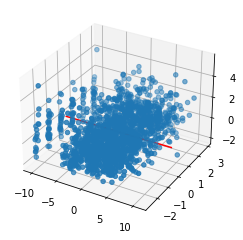

In [ ]:


from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'], principalDf['principal component 3'])

x_axis = ((min(principalDf['principal component 1']), max(principalDf['principal component 1'])), (0,0), (0,0))
ax.plot(x_axis[0], x_axis[1], x_axis[2], "r")
y_axis = ((min(principalDf['principal component 2']), max(principalDf['principal component 2'])), (0,0), (0,0))
ax.plot(y_axis[0], y_axis[1], y_axis[2], "r")
z_axis = ((min(principalDf['principal component 3']), max(principalDf['principal component 3'])), (0,0), (0,0))
ax.plot(z_axis[0], z_axis[1], z_axis[2], "r")

The data clearly has high variance over the principal component represented by the x axis. We will use PCA reduce the variance as such. 

In [ ]:
#We want to reduce variance, so now, for the n_components hyperparameter, we will specify a decimal representing the amount of variance we want to keep
#The algorithm will select the number of components to keep 85% of the variance in the data
pca = PCA(n_components = 3)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)
pca.n_components_

3

In [ ]:
classifier = LogisticRegression(random_state = 0).fit(x_train_pca, y_train)
prediction_pca = classifier.predict(x_test_pca)
Decision_Function_pca = classifier.decision_function(x_test_pca)
print('ROC AUC score is ', metrics.roc_auc_score(y_true = y_test, y_score = prediction_pca))

ROC AUC score is  0.5399554025639287


Surprisingly, the PCA dimensionality reduction actually failed to improve the model. This is possibly due to the fact that PCA causes a loss of information when reducing dimensionality for logistic and linear regression cases. 

Model 2: K Nearest Neighbours

We will now tune a KNN model using the grid search cross validation, then see the cross validation score it produces. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(leaf_size=list(range(1,50)), n_neighbors=list(range(1,30)), p=[1,2])
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters)
knn_cv_fit = clf.fit(x_train, y_train)

In [ ]:
knn_cv_fit.best_params_, knn_cv_fit.best_score_

({'leaf_size': 1, 'n_neighbors': 27, 'p': 1}, 0.8185074626865673)

Model 3: Random Forest Regression

We will now tune a Random Forest model using the grid search cross validation, then see the cross validation score it produces. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# number of trees
n_estimators = [200, 500, 800] #equivalent of trees in r

# max number of levels in tree
max_features = ['auto', 'sqrt', 'log2'] #equivalent of mtry in r

# minimum number of samples required to split a node
min_samples_split = [10, 15, 20] #equivalent of min_n in r


grid_param = {'n_estimators': n_estimators, 'max_features': max_features, 'min_samples_split': min_samples_split}

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, grid_param)
clf.fit(x_train, y_train)

In [ ]:
CV_gbc = clf
CV_gbc.best_params_, CV_gbc.best_score_

({'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 800},
 0.8859701492537313)

Model 4: Gradient Boosting

We will now tune a Gradient Boosting model using the grid search cross validation, then see the cross validation score it produces. 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

#some useful shit: https://www.kaggle.com/code/elyousfiomar/hyperparameter-tuning-gradient-boosting
n_estimators_grid = {'n_estimators' : [64, 100, 200]}
CV_gbc = GridSearchCV(estimator=gbc, param_grid=n_estimators_grid, scoring='roc_auc',n_jobs=4)
CV_gbc.fit(x_train, y_train)
CV_gbc.best_params_, CV_gbc.best_score_

({'n_estimators': 64}, 0.8884820512820515)

We see that the best cross validation scores goes to the Random Forest and Gradient Boosting Classifier. Hence, we will use these models to fit the data and make predictions. 

##PREDICTION

In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 100)

In [ ]:
gbc.fit(x_train, y_train)
prediction_gbc = gbc.predict(x_test)
print('ROC AUC score is ', metrics.roc_auc_score(y_true = y_test, y_score = prediction_gbc))

ROC AUC score is  0.8217331954147732


In [ ]:
rfc = RandomForestClassifier(max_features = "log2", min_samples_split = 10, n_estimators = 200)
rfc.fit(x_train, y_train)
prediction_rfc = rfc.predict(x_test)
print('ROC AUC score is ', metrics.roc_auc_score(y_true = y_test, y_score = prediction_rfc))

ROC AUC score is  0.8007740961812386


We see ROC scores of around 80%, the best one, Gradient Boosting, producing an ROC score of 82%.

##CONCLUSION

Overall, we see that the gradient boosting model performs the best compared to others. One surprise is why the PCA dimensionality reduction made the logistic regression model worse; my theory is that the reduction led to too high of a loss of information (it may have poorly combined categorical and continuous data). For the future of this project, I would like to explore how adding or reducing model complexity might affect our accuracy scores. I would also like to explore the most important features for predicting debt. 

Exporting the python notebook:

In [ ]:
!jupyter nbconvert --to html /content/Final_Project.ipynb 

[NbConvertApp] Converting notebook /content/Final_Project.ipynb to html
[NbConvertApp] Writing 1166982 bytes to /content/Final_Project.html
